In [ ]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop
from keras.datasets import cifar10
from keras.applications import resnet50
from keras.preprocessing import image
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
sns.set()
!pip install ipython-autotime
import autotime 
%load_ext autotime
%matplotlib inline

time: 1.25 ms


In [ ]:
#Loading the data
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

time: 672 ms


In [ ]:
#Shape of data
print('X_train shape: {}, y_train_labels.shape: {}'
      .format(X_train.shape, y_train.shape))
print('X_test shape: {}, y_test_labels.shape: {}'.format(X_test.shape, y_test.shape))

X_train shape: (50000, 32, 32, 3), y_train_labels.shape: (50000, 1)
X_test shape: (10000, 32, 32, 3), y_test_labels.shape: (10000, 1)
time: 1.91 ms


In [ ]:
labels=["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

time: 866 µs


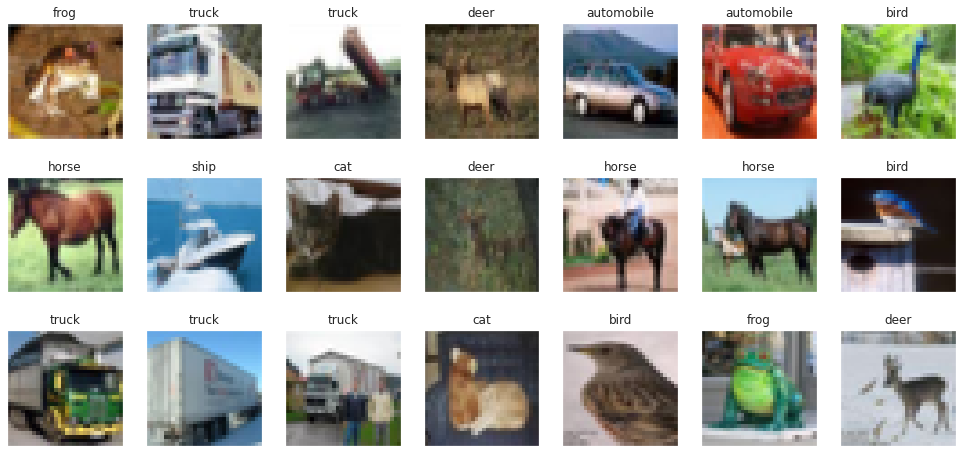

time: 746 ms


In [ ]:
#Checking the images
fig, axes = plt.subplots(ncols=7, nrows=3, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title(labels[y_train[index][0]])
        axes[i,j].imshow(X_train[index])
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

In [ ]:
#Label pre processing
y_train = tensorflow.keras.utils.to_categorical(y_train, 10)
y_test= tensorflow.keras.utils.to_categorical(y_test, 10)
y_test.shape

(10000, 10)

time: 6.03 ms


In [ ]:
#Reshape
from tensorflow.keras import backend as K

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 3, 32, 32)
    X_test = X_test.reshape(X_test.shape[0], 3, 32, 32)
    input_shape = (3, 32, 32)
else:
    X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
    X_test = X_test.reshape(X_test.shape[0], 32,32 ,3)
    input_shape = (32,32, 3)
    
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

time: 253 ms


In [ ]:
#Building a model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
# 64 3x3 kernels
model.add(Conv2D(64, (3, 3), activation='relu'))
# Reduce by taking the max of each 2x2 block
model.add(MaxPooling2D(pool_size=(2, 2)))
# Flatten the results to one dimension for passing into our final layer
model.add(Flatten())
# A hidden layer to learn with
model.add(Dense(512, activation='relu'))
# Another dropout
model.add(Dropout(0.25))
# Final categorization from 0-9 with softmax
model.add(Dense(10, activation='softmax'))

time: 822 ms


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               6423040   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='RMSProp',
              metrics=['accuracy'])

time: 16.6 ms


In [ ]:
history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=50,
                    verbose=1,
                    validation_data=(X_test, y_test))

Epoch 1/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.3391 - accuracy: 0.5328 - val_loss: 1.1831 - val_accuracy: 0.6003
Epoch 2/50
1563/1563 [==============================] - 15s 9ms/step - loss: 0.9547 - accuracy: 0.6736 - val_loss: 0.9453 - val_accuracy: 0.6767
Epoch 3/50
1563/1563 [==============================] - 15s 10ms/step - loss: 0.8081 - accuracy: 0.7271 - val_loss: 1.0004 - val_accuracy: 0.6859
Epoch 4/50
1563/1563 [==============================] - 15s 10ms/step - loss: 0.7151 - accuracy: 0.7642 - val_loss: 1.1628 - val_accuracy: 0.6784
Epoch 5/50
1563/1563 [==============================] - 15s 10ms/step - loss: 0.6645 - accuracy: 0.7868 - val_loss: 1.2538 - val_accuracy: 0.6894
Epoch 6/50
1563/1563 [==============================] - 15s 9ms/step - loss: 0.6368 - accuracy: 0.7965 - val_loss: 1.0696 - val_accuracy: 0.6772
Epoch 7/50
1563/1563 [==============================] - 15s 10ms/step - loss: 0.6141 - accuracy: 0.8040 - val_loss: 1.2091 - v

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.8511338233947754
Test accuracy: 0.5315999984741211
time: 905 ms


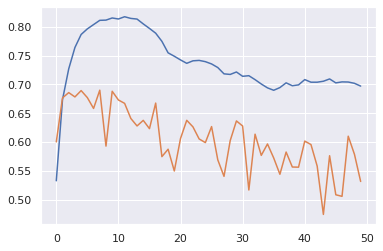

time: 216 ms


In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

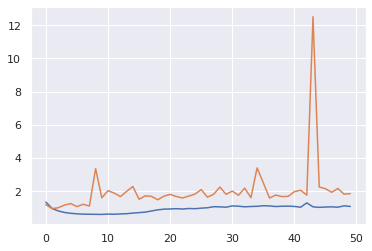

time: 192 ms


In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

time: 7.95 s


In [ ]:

#Load images
truck = image.load_img("truck.jpg", target_size=(32, 32))
auto = image.load_img("automobile.jpg", target_size=(32, 32))
dog = image.load_img("dog.jpg", target_size=(32, 32))
cat = image.load_img("cat.jpg", target_size=(32, 32))
plane = image.load_img("airplane.jpg", target_size=(32, 32))

time: 101 ms


In [ ]:
truck = image.img_to_array(truck)
auto = image.img_to_array(auto)
dog = image.img_to_array(dog)
cat = image.img_to_array(cat)
plane = image.img_to_array(plane)

time: 2.02 ms


In [ ]:
truck= np.expand_dims(truck, axis=0)
auto = np.expand_dims(auto, axis=0)
dog = np.expand_dims(dog, axis=0)
cat = np.expand_dims(cat, axis=0)
plane = np.expand_dims(plane, axis=0)

time: 2.28 ms


In [ ]:
predictions_truck = model.predict(truck)
predictions_auto = model.predict(auto)
predictions_dog = model.predict(dog)
predictions_cat = model.predict(cat)
predictions_plane = model.predict(plane)

time: 212 ms


1: Airplane
2: Car
3: Bird
4: Cat
5: Deer
6: Dog
7: Frog
8: Horse
9: Ships
10: Truck

In [ ]:
print("Prediction truck")
predictions_truck
#prediction: 1: airplane
#actual: truck

Prediction truck


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

time: 7.36 ms


In [ ]:
print("Prediction Auto")
predictions_auto
#prediction: 1: Airplane
#actual: Car

Prediction Auto


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

time: 4.62 ms


In [ ]:
print("Prediction Dog")
predictions_dog
#prediction: 7:frog
#actual: dog

Prediction Dog


array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

time: 3.68 ms


In [ ]:
print("Prediction Cat")
predictions_cat
#prediction: 3: bird
#actual: cat

Prediction Cat


array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

time: 3.56 ms


In [ ]:
print("Prediction Airplaine")
predictions_plane
#prediction: 1: airplane
#actual: airplane

Prediction Airplaine


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

time: 4.25 ms


<Figure size 288x216 with 0 Axes>

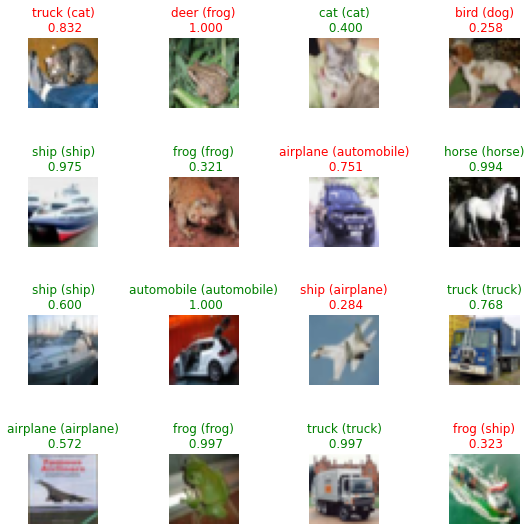

time: 2.63 s


In [ ]:
from matplotlib import pyplot
%matplotlib inline
y_test = y_test.argmax(1)

def plot_predictions(images, predictions, true_labels):
  n = images.shape[0]
  nc = int(np.ceil(n / 4))
  fig = pyplot.figure(figsize=(4,3))
  # axes = fig.add_subplot(nc, 4)
  f, axes = pyplot.subplots(nc, 4)
  f.tight_layout()
  for i in range(nc * 4):
    y = i // 4
    x = i % 4
    axes[x, y].axis('off')
    
    label = labels[np.argmax(predictions[i])]
    confidence = np.max(predictions[i])
    if i > n:
      continue
    axes[x, y].imshow(images[i])
    pred_label = np.argmax(predictions[i])
    axes[x, y].set_title("{} ({})\n {:.3f}".format(
      labels[pred_label], 
      labels[true_labels[i]],
      confidence), 
      color=("green" if true_labels[i] == pred_label else "red"))
  pyplot.gcf().set_size_inches(8, 8)  

plot_predictions(
    np.squeeze(X_test[:16]), 
    model.predict(X_test[:16]),
    y_test[:16]
)

